# LATAM Data Science Challenge

## Problema 

El problema consiste en predecir la probabilidad de atraso de los vuelos que 
aterrizan o despegan del aeropuerto de Santiago de Chile (SCL). Para eso les 
entregamos un dataset usando datos públicos y reales donde cada fila 
corresponde a un vuelo que aterrizó o despegó de SCL. Para cada vuelo se cuenta
con la siguiente información:** 


In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.tree import export_graphviz

import statsmodels.api as sm
from IPython.display import display
from pandas_profiling import ProfileReport
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

## **Features**:

**Fecha-I :** Fecha y hora programada del vuelo. 

**Vlo-I :** Número de vuelo programado. 

**Ori-I :** Código de ciudad de origen programado. 

**Des-I :** Código de ciudad de destino programado. 

**Emp-I :** Código aerolínea de vuelo programado. 

**Fecha-O :** Fecha y hora de operación del vuelo. 

**Vlo-O :** Número de vuelo de operación del vuelo. 

**Ori-O :** Código de ciudad de origen de operación 

**Des-O :** Código de ciudad de destino de operación. 

**Emp-O :** Código aerolínea de vuelo operado. 

**DIA :** Día del mes de operación del vuelo. 

**MES :** Número de mes de operación del vuelo. 

**AÑO :** Año de operación del vuelo. 

**DIANOM :** Día de la semana de operación del vuelo. 

**TIPOVUELO :** Tipo de vuelo, I =Internacional, N =Nacional. 

**OPERA :** Nombre de aerolínea que opera. 

**SIGLAORI :** Nombre ciudad origen. 

**SIGLADES :** Nombre ciudad destino.

### --- Synthetics+ ---
**Hora-O :** Hora de operación de vuelo

**Hora-I :** Hora programada de vuelo

**temporada_alta :** 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.

**dif_min :** diferencia en minutos entre Fecha-O y Fecha-I .

**atraso_15 :** 1 si dif_min > 15, 0 si no.

**periodo_dia :** mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), con base a
Fecha-I .

**Dummies :**
    
    ['Ori-I',
    
    'Des-I',
    
    'Emp-I',
    
    'Ori-O',
    
    'Des-O',
    
    'Emp-O',
    
    'DIANOM',
    
    'TIPOVUELO',
    
    'OPERA',
    
    'SIGLAORI',
    
    'SIGLADES']

Desafío 
1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto? 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv : 
○ temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no. ○ dif_min : diferencia en minutos entre Fecha-O y Fecha-I . 
○ atraso_15 : 1 si dif_min > 15, 0 si no. 
○ periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I . 
3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos? 
4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas. 
5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la performance? 


## Desafío 
### #1

### 1.1 ¿Cómo se distribuyen los datos? 

In [2]:
df = pd.read_csv('./data/dataset_SCL.csv')

In [3]:
df.describe()

DIA           MES           AÑO
count  68206.000000  68206.000000  68206.000000
mean      15.714790      6.622585   2017.000029
std        8.782886      3.523321      0.005415
min        1.000000      1.000000   2017.000000
25%        8.000000      3.000000   2017.000000
50%       16.000000      7.000000   2017.000000
75%       23.000000     10.000000   2017.000000
max       31.000000     12.000000   2018.000000

In [4]:
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'])

In [5]:
df['Hora-O'] = df['Fecha-O'].dt.hour
df['Hora-I'] = df['Fecha-I'].dt.hour

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

In [7]:
df.head()

Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O Ori-O  \
0 2017-01-01 23:30:00   226  SCEL  KMIA   AAL 2017-01-01 23:33:00   226  SCEL   
1 2017-01-02 23:30:00   226  SCEL  KMIA   AAL 2017-01-02 23:39:00   226  SCEL   
2 2017-01-03 23:30:00   226  SCEL  KMIA   AAL 2017-01-03 23:39:00   226  SCEL   
3 2017-01-04 23:30:00   226  SCEL  KMIA   AAL 2017-01-04 23:33:00   226  SCEL   
4 2017-01-05 23:30:00   226  SCEL  KMIA   AAL 2017-01-05 23:28:00   226  SCEL   

  Des-O Emp-O  DIA  MES   AÑO     DIANOM TIPOVUELO              OPERA  \
0  KMIA   AAL    1    1  2017    Domingo         I  American Airlines   
1  KMIA   AAL    2    1  2017      Lunes         I  American Airlines   
2  KMIA   AAL    3    1  2017     Martes         I  American Airlines   
3  KMIA   AAL    4    1  2017  Miercoles         I  American Airlines   
4  KMIA   AAL    5    1  2017     Jueves         I  American Airlines   

   SIGLAORI SIGLADES  Hora-O  Hora-I  
0  Santiago    Miami      23      23  
1  Santiago    Miami      23      23  
2  Santiago    Miami      23      23  
3  Santiago    Miami      23      23  
4  Santiago    Miami      23      23

In [8]:
profile = ProfileReport(df, title="Vuelos de Santiago de Chile",explorative=True)
profile.to_file("profiling/profile_report.html")

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 1.2 ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

- El número de vuelo por día del mes durante todo el año parece uniforme. Excepciones porque no todos los meses tienen el mismo número de días. 2017 no es bisiesto.
- Hay 2 épocas donde hay más tráfico. Al rededor de diciembre a enero y de septiembre a noviembre
- Solo tenemos datos de un año, 2017 (hay 2 puntos de 2018, probablemente por huso horario).
- 

### 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv : 

    ○ temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no. 

    ○ dif_min : diferencia en minutos entre Fecha-O y Fecha-I . 

    ○ atraso_15 : 1 si dif_min > 15, 0 si no. 

    ○ periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I . 

In [9]:
synthetic_features = pd.DataFrame()
#1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
date_1_start = pd.to_datetime('2017/12/15 00:00', format='%Y/%m/%d %H:%M')
date_1_end = pd.to_datetime('2017/03/03 00:00', format='%Y/%m/%d %H:%M')

date_2_start = pd.to_datetime('2017/07/15 00:00', format='%Y/%m/%d %H:%M')
date_2_end = pd.to_datetime('2017/07/31 00:00', format='%Y/%m/%d %H:%M')

date_3_start = pd.to_datetime('2017/09/11 00:00', format='%Y/%m/%d %H:%M')
date_3_end = pd.to_datetime('2017/09/30 00:00', format='%Y/%m/%d %H:%M')



temp_alta_mask = (df['Fecha-I'] >= date_1_start) | (df['Fecha-I'] <= date_1_end)
temp_alta_mask_2 = (df['Fecha-I'] >= date_2_start) & (df['Fecha-I'] <= date_2_end)
temp_alta_mask_3 = (df['Fecha-I'] >= date_3_start) & (df['Fecha-I'] <= date_3_end)

synthetic_features['Fecha-I'] = df['Fecha-I']
synthetic_features['temporada_alta'] =np.select([temp_alta_mask,temp_alta_mask_2, temp_alta_mask_3],[1,1,1],default=0)


# dif_min : diferencia en minutos entre Fecha-O y Fecha-I .
synthetic_features['dif_min'] = (df['Fecha-O'] - df['Fecha-I']).dt.total_seconds()/60

# 1 si dif_min > 15, 0 si no. 
atraso_mask = (synthetic_features['dif_min'] >= 15)
synthetic_features['atraso_15'] = np.select([atraso_mask],[1],default=0)

# periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59)
# y noche (entre 19:00 y 4:59), en base a Fecha-I.

def period_day(hour):
    if hour >= 5 and hour<= 11:
        return 'mañana'
    elif hour >= 12 and hour<= 18:
        return 'tarde'
    else:
        return 'noche'

synthetic_features['periodo_dia'] = df['Hora-I'].apply(period_day)
synthetic_features['mismo_destino'] = df.apply(lambda x: 1 if x['Des-O'] == x['Des-I'] else 0, axis=1)
synthetic_features['mismo_operador'] = df.apply(lambda x: 1 if x['Emp-O'] == x['Emp-I'] else 0, axis=1)
 

synthetic_features.to_csv('data/synthetic_features.csv',index=False)


In [10]:
synthetic_features = pd.read_csv('data/synthetic_features.csv')

### 3
### ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? 

In [11]:
df['index1'] = df.index
synthetic_features['index1'] = synthetic_features.index

In [12]:
synth_to_merge = synthetic_features.drop('Fecha-I', axis=1)
result = pd.merge(df,synth_to_merge,on='index1',left_index=False, right_index=False, how='left').drop('index1',axis=1)

### Exploremos cómo afectan las variables respecto al tiempo de retraso

#### Podemos ver que diferentes destinos y diferentes momentos de la semana y del día tiene distintos atrasos

In [13]:
result['es_finde'] = result['DIANOM'].apply(lambda x: 1 if x in ('Sabado','Domingo') else 0)

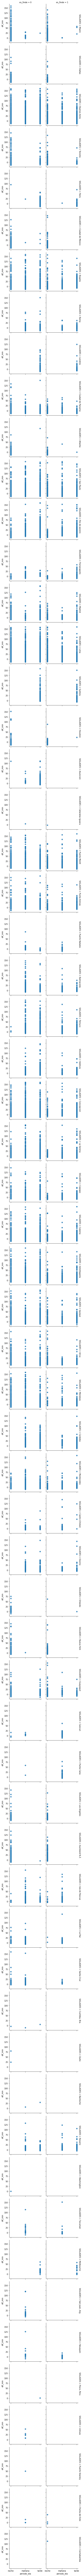

In [14]:
g = sns.FacetGrid(result, row="SIGLADES", col="es_finde", margin_titles=True)
g.map(sns.regplot, "periodo_dia", "dif_min", fit_reg=False)

In [15]:
g.savefig('img/destino_finde_retraso.png')

Observemos si el operador tiene que ver con el tiempo de atraso y dividamos entre atrasos cortos y largos

<AxesSubplot:xlabel='dif_min', ylabel='OPERA'>

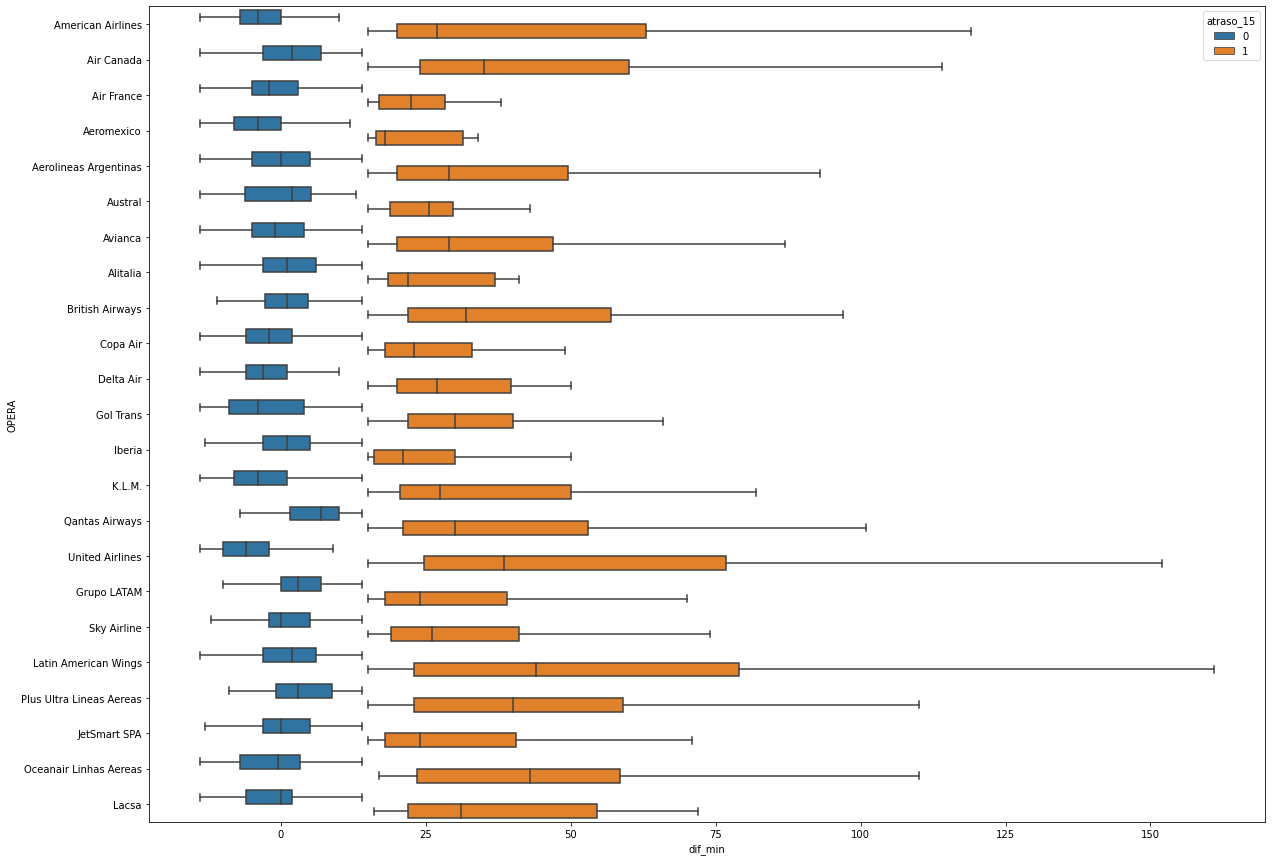

In [16]:
result["dif_min_interval"] = pd.cut(result.dif_min,5) 
plt.figure(figsize=(20, 15)) 
sns.boxplot(x="dif_min", y="OPERA", data=result,hue = "atraso_15", showfliers = False)  

Observemos si en el caso de ir a un destino al planeado distinto se observa diferencia de atraso en el vuelo

<AxesSubplot:xlabel='dif_min', ylabel='OPERA'>

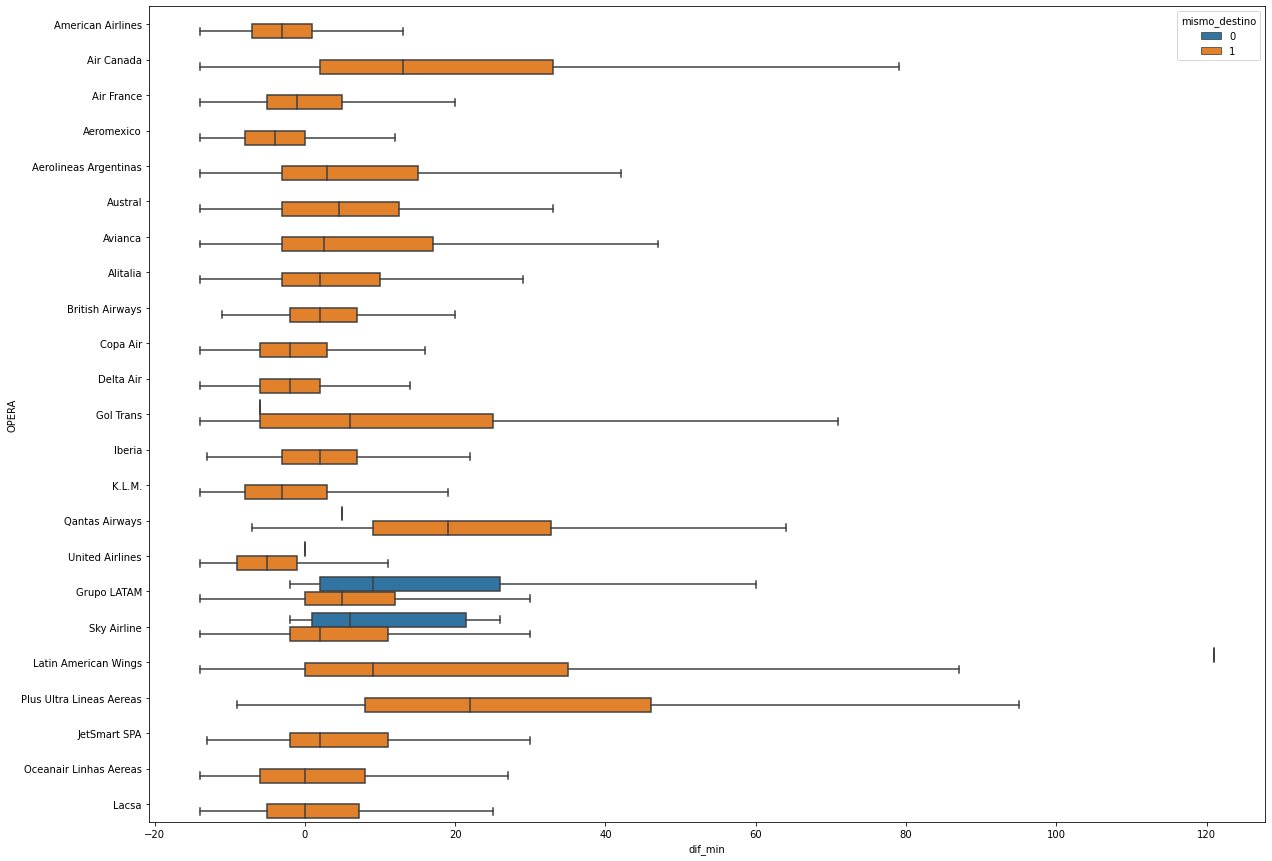

In [17]:
plt.figure(figsize=(20, 15)) 
sns.boxplot(x="dif_min", y="OPERA", data=result,hue = "mismo_destino", showfliers = False)  

Veamos si el destino implica mayor o menor varianza y promedio de atraso

<AxesSubplot:xlabel='dif_min', ylabel='Des-O'>

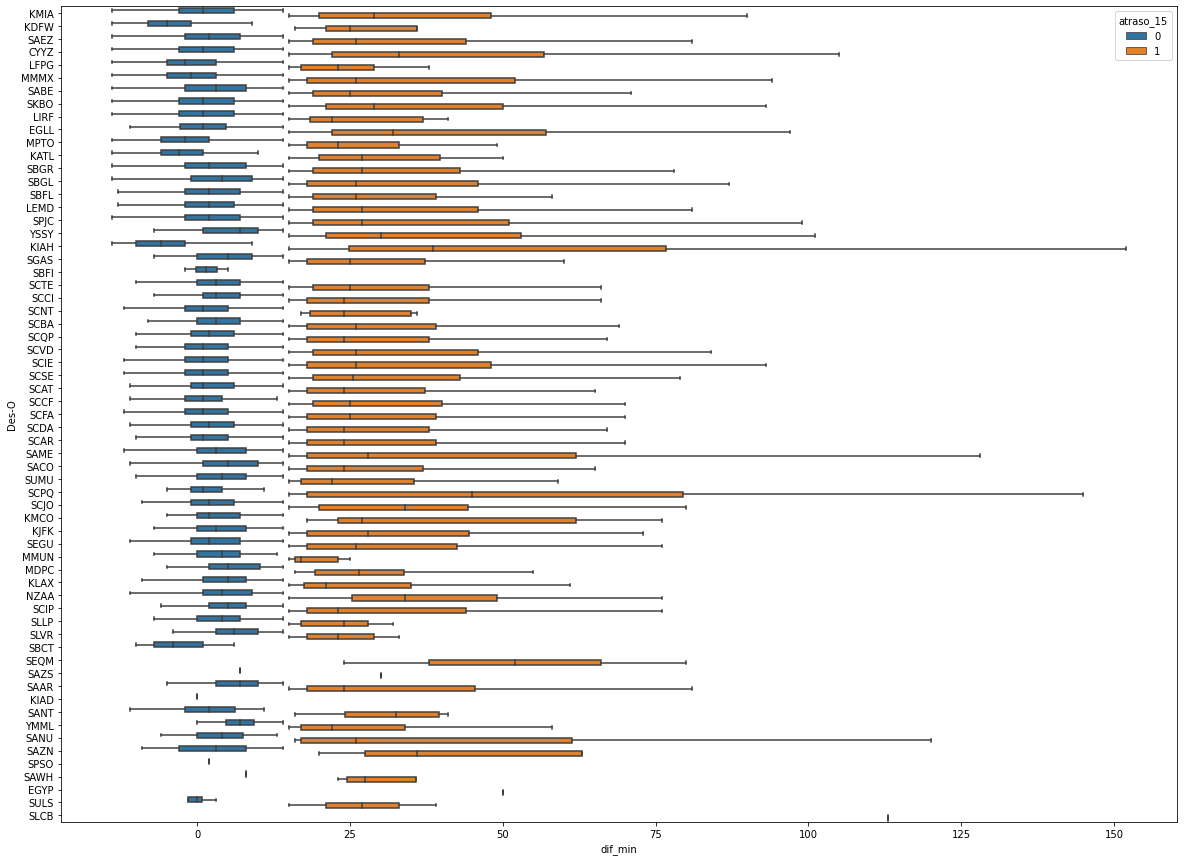

In [18]:
plt.figure(figsize=(20, 15)) 
sns.boxplot(x="dif_min", y="Des-O", data=result,hue = "atraso_15", showfliers = False)  

Observemos cada cuanto y en que rango de tiempo de retraso se observa en un tipo de temporada y momento del día

In [19]:
dx = result  
dx = dx.groupby(["temporada_alta", "periodo_dia"])["dif_min_interval"]
dx = dx.value_counts()
dx = dx.unstack() 
dx = dx.apply(lambda x: x/x.sum(), axis=1) 
print(dx.to_string(float_format="%.3f"))

                            (-14.175, 21.0]  (21.0, 56.0]  (56.0, 91.0]  (91.0, 126.0]  (126.0, 161.0]
temporada_alta periodo_dia                                                                            
0              mañana                 0.898         0.075         0.014          0.007           0.005
               noche                  0.860         0.099         0.024          0.012           0.005
               tarde                  0.869         0.101         0.020          0.007           0.003
1              mañana                 0.895         0.076         0.016          0.008           0.004
               noche                  0.846         0.109         0.029          0.011           0.005
               tarde                  0.858         0.105         0.022          0.010           0.005


In [20]:
dumm_cols = ['Ori-I','Des-I','Emp-I','Ori-O','Des-O',
             'Emp-O','DIANOM','TIPOVUELO','OPERA',
             'SIGLAORI', 'SIGLADES']
dum_df = pd.get_dummies(data=result, columns=dumm_cols)

In [21]:
dum_df = dum_df.loc[:,~dum_df.columns.str.startswith('Emp-O')]
dum_df = dum_df.loc[:,~dum_df.columns.str.startswith('Des-O')]
dum_df = dum_df.drop('atraso_15',axis=1)

### ¿Qué variables esperarías que más influyeran en predecir atrasos? 

Veamos las correlaciones de cada variable respecto a los atrasos de vuelos

In [22]:
corr = dum_df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

#### Y pongamos de mayor a menor según su correlación absoluta (tomando en cuenta solo la magnitud).

In [23]:
corr['dif_min'].apply(np.abs).sort_values(ascending=False)[1:].head(20)

OPERA_Latin American Wings    0.126937
Emp-I_LAW                     0.122857
MES                           0.077280
Des-I_MPTO                    0.076917
Emp-I_CMP                     0.076917
OPERA_Copa Air                0.076917
SIGLADES_Ciudad de Panama     0.076917
TIPOVUELO_I                   0.072733
TIPOVUELO_N                   0.072733
Hora-O                        0.065756
Emp-I_ACA                     0.065299
OPERA_Air Canada              0.065299
Hora-I                        0.055503
SIGLADES_Mendoza              0.051784
Des-I_SAME                    0.051784
SIGLADES_Sydney               0.049328
OPERA_Qantas Airways          0.049143
Des-I_YSSY                    0.049143
Emp-I_QFU                     0.049143
OPERA_American Airlines       0.048455
Name: dif_min, dtype: float64

#### Para seleccionar los mejores podemos tomar su [Coeficiente de correlación punto-biserial](https://en.wikipedia.org/wiki/Point-biserial_correlation_coefficient)

In [24]:
drop_pvalues = []
for i in dum_df.columns:
    try:
        x = dum_df[i]
        y = dum_df['dif_min']
        spb = stats.pointbiserialr(x,y)
        if np.abs(spb[1]) >= 0.05:
            drop_pvalues.append(i)
    except:
        drop_pvalues.append(i)
        print(f"Variable:{i} not valid")
drop_pvalues.append('dif_min')
print('\n**Variables eliminadas:**\n')
drop_pvalues

Variable:Fecha-I not valid
Variable:Vlo-I not valid
Variable:Fecha-O not valid
Variable:Vlo-O not valid
Variable:periodo_dia not valid
Variable:dif_min_interval not valid

**Variables eliminadas:**



['Fecha-I',
 'Vlo-I',
 'Fecha-O',
 'Vlo-O',
 'DIA',
 'AÑO',
 'periodo_dia',
 'dif_min_interval',
 'Des-I_EGLL',
 'Des-I_KMCO',
 'Des-I_KMIA',
 'Des-I_LEMD',
 'Des-I_MDPC',
 'Des-I_MMUN',
 'Des-I_SANT',
 'Des-I_SANU',
 'Des-I_SARI',
 'Des-I_SAWH',
 'Des-I_SAZN',
 'Des-I_SAZS',
 'Des-I_SBCT',
 'Des-I_SBFI',
 'Des-I_SBFL',
 'Des-I_SCBA',
 'Des-I_SCCI',
 'Des-I_SCDA',
 'Des-I_SCJO',
 'Des-I_SCTE',
 'Des-I_SCVD',
 'Des-I_SEGU',
 'Des-I_SEQM',
 'Des-I_SLLP',
 'Des-I_SPSO',
 'Des-I_SULS',
 'Emp-I_AUT',
 'Emp-I_BAW',
 'Emp-I_LAN',
 'Emp-I_LNE',
 'Emp-I_LPE',
 'OPERA_Austral',
 'OPERA_British Airways',
 'SIGLADES_Balmaceda',
 'SIGLADES_Bariloche',
 'SIGLADES_Cancun',
 'SIGLADES_Cataratas Iguacu',
 'SIGLADES_Curitiba, Bra.',
 'SIGLADES_Florianapolis',
 'SIGLADES_Guayaquil',
 'SIGLADES_Iquique',
 'SIGLADES_La Paz',
 'SIGLADES_Londres',
 'SIGLADES_Madrid',
 'SIGLADES_Miami',
 'SIGLADES_Neuquen',
 'SIGLADES_Orlando',
 'SIGLADES_Osorno',
 'SIGLADES_Pisco, Peru',
 'SIGLADES_Puerto Montt',
 'SIGLADES_

### 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas. 

In [25]:
X  = dum_df.drop(drop_pvalues, axis=1)
y  = dum_df.dif_min

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [27]:
X_train.describe()

MES        Hora-O        Hora-I  temporada_alta  \
count  51154.000000  51154.000000  51154.000000    51154.000000   
mean       6.605309     12.470481     12.474645        0.325175   
std        3.523605      5.833596      5.791849        0.468445   
min        1.000000      0.000000      0.000000        0.000000   
25%        3.000000      8.000000      8.000000        0.000000   
50%        7.000000     13.000000     13.000000        0.000000   
75%       10.000000     17.000000     17.000000        1.000000   
max       12.000000     23.000000     23.000000        1.000000   

       mismo_destino  mismo_operador      es_finde  Ori-I_SCEL    Des-I_CYYZ  \
count    51154.00000    51154.000000  51154.000000     51154.0  51154.000000   
mean         0.99955        0.727059      0.269480         1.0      0.004164   
std          0.02120        0.445475      0.443694         0.0      0.064394   
min          0.00000        0.000000      0.000000         1.0      0.000000   
25%          1.00000        0.000000      0.000000         1.0      0.000000   
50%          1.00000        1.000000      0.000000         1.0      0.000000   
75%          1.00000        1.000000      1.000000         1.0      0.000000   
max          1.00000        1.000000      1.000000         1.0      1.000000   

         Des-I_EGYP  ...  SIGLADES_Puerto Stanley  SIGLADES_Quito  \
count  51154.000000  ...             51154.000000         51154.0   
mean       0.000020  ...                 0.000020             0.0   
std        0.004421  ...                 0.004421             0.0   
min        0.000000  ...                 0.000000             0.0   
25%        0.000000  ...                 0.000000             0.0   
50%        0.000000  ...                 0.000000             0.0   
75%        0.000000  ...                 0.000000             0.0   
max        1.000000  ...                 1.000000             0.0   

       SIGLADES_Rio de Janeiro  SIGLADES_Roma  SIGLADES_Rosario  \
count             51154.000000   51154.000000      51154.000000   
mean                  0.021269       0.003792          0.002092   
std                   0.144281       0.061467          0.045688   
min                   0.000000       0.000000          0.000000   
25%                   0.000000       0.000000          0.000000   
50%                   0.000000       0.000000          0.000000   
75%                   0.000000       0.000000          0.000000   
max                   1.000000       1.000000          1.000000   

       SIGLADES_Santa Cruz  SIGLADES_Sao Paulo  SIGLADES_Sydney  \
count         51154.000000        51154.000000     51154.000000   
mean              0.001896            0.052606         0.002893   
std               0.043505            0.223248         0.053711   
min               0.000000            0.000000         0.000000   
25%               0.000000            0.000000         0.000000   
50%               0.000000            0.000000         0.000000   
75%               0.000000            0.000000         0.000000   
max               1.000000            1.000000         1.000000   

       SIGLADES_Temuco  SIGLADES_Toronto  
count     51154.000000      51154.000000  
mean          0.038609          0.004164  
std           0.192663          0.064394  
min           0.000000          0.000000  
25%           0.000000          0.000000  
50%           0.000000          0.000000  
75%           0.000000          0.000000  
max           1.000000          1.000000  

[8 rows x 140 columns]

#### Intentemos entrenar 3 modelos regresivos para ver cual se acerca más a los valores que queremos predecir

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [29]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [30]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train,y_train)

RandomForestRegressor()

In [31]:
lin_scores = cross_val_score(lin_reg,X_test,y_test, scoring='neg_mean_squared_error',cv=10)
tree_scores = cross_val_score(tree_reg,X_test,y_test, scoring='neg_mean_squared_error',cv=10)
forest_scores = cross_val_score(forest_reg,X_test,y_test, scoring='neg_mean_squared_error',cv=10)

In [32]:
tree_rmse_scores = np.sqrt(-tree_scores)
lin_reg_scores = np.sqrt(-lin_scores)
forest_reg_scores = np.sqrt(-forest_scores)

### 5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la performance? 

Veamos que tan bien ajusta cada modelo

In [33]:
def display_scores(scores):
    print(f'Scores: {scores}\n')
    print(f'Mean: {scores.mean()}\n')
    print(f'Standard deviation: {scores.std()}')

print(f'Linear Regression:\n')
display_scores(lin_reg_scores)

print(f'\nDecision tree:\n')
display_scores(tree_rmse_scores)

print(f'\nRandom Forest:\n')
display_scores(forest_reg_scores)

Linear Regression:

Scores: [1.78668307e+01 1.81171435e+01 1.93582855e+01 4.83912891e+06
 1.95511824e+01 1.94117388e+01 5.82131556e+07 1.87537063e+01
 1.06411854e+09 1.94035630e+01]

Mean: 112717095.62231791

Standard deviation: 317601797.5033169

Decision tree:

Scores: [15.90032628 16.10661232 16.69989318 17.02174503 15.52277036 16.08372434
 17.74734188 15.96046106 17.58302823 19.36549722]

Mean: 16.799139990063427

Standard deviation: 1.1086452060835459

Random Forest:

Scores: [13.4290446  13.40140293 14.15123197 13.57516437 12.846045   13.19733294
 13.79590482 12.87215996 13.2386276  14.75531597]

Mean: 13.526223017655147

Standard deviation: 0.5552272808770355


#### Podemos ver que el mejor modelo (o al menos con el menor error y desviación standard) es el de Random Forest

### Ajuste de hiperparámetros

In [34]:
param_grid = [
    {'n_estimators': [3,10,30,100], 'max_features': [10,50,100,139]},
    {'bootstrap':[False],'n_estimators': [3,10], 'max_features':[2,3,4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg,param_grid,cv = 5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True )

#### Utilizando una estrategia griddy escogemos la mejor configuración de hiperparámetros

In [35]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [10, 50, 100, 139],
                          'n_estimators': [3, 10, 30, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [36]:
feature_importances = grid_search.best_estimator_.feature_importances_

Podemos ver de cada parámetro su importancia de mayor a menor

In [37]:
sorted(zip(feature_importances,X.columns),reverse=True)

[(0.305466102303195, 'Hora-I'),
 (0.3045542050823303, 'Hora-O'),
 (0.08109289536953217, 'MES'),
 (0.020320226306339992, 'temporada_alta'),
 (0.01811551661146952, 'OPERA_Latin American Wings'),
 (0.013304242712681557, 'DIANOM_Viernes'),
 (0.01298453690087732, 'DIANOM_Lunes'),
 (0.012427718640757673, 'OPERA_Grupo LATAM'),
 (0.011762552776886287, 'DIANOM_Jueves'),
 (0.011636590708752219, 'DIANOM_Martes'),
 (0.011539311264390176, 'DIANOM_Miercoles'),
 (0.011196825046534553, 'mismo_operador'),
 (0.009409657014574711, 'es_finde'),
 (0.008970434901292106, 'DIANOM_Domingo'),
 (0.007732029076065892, 'DIANOM_Sabado'),
 (0.007002504722151214, 'TIPOVUELO_N'),
 (0.006698939051531243, 'TIPOVUELO_I'),
 (0.005823855042750433, 'SIGLADES_Buenos Aires'),
 (0.005129521873848898, 'Emp-I_SKU'),
 (0.004917290089710489, 'OPERA_Sky Airline'),
 (0.004807490826000504, 'Des-I_SCFA'),
 (0.004653172241357172, 'SIGLADES_Antofagasta'),
 (0.004466888027596417, 'Emp-I_TAM'),
 (0.004239924117220909, 'Des-I_SPJC'),
 (0.0

Mostramos de las configuraciones hechas los resultados obtenidos para elegir el mejor

In [38]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

17.554298778912635 {'max_features': 10, 'n_estimators': 3}
16.41332949280034 {'max_features': 10, 'n_estimators': 10}
16.247340677315716 {'max_features': 10, 'n_estimators': 30}
16.069059941081072 {'max_features': 10, 'n_estimators': 100}
15.421518524075772 {'max_features': 50, 'n_estimators': 3}
14.173247731938368 {'max_features': 50, 'n_estimators': 10}
13.83130448754325 {'max_features': 50, 'n_estimators': 30}
13.678433070120555 {'max_features': 50, 'n_estimators': 100}
14.153927120673696 {'max_features': 100, 'n_estimators': 3}
12.940956785971892 {'max_features': 100, 'n_estimators': 10}
12.702735497903605 {'max_features': 100, 'n_estimators': 30}
12.612472614868992 {'max_features': 100, 'n_estimators': 100}
13.811172922569433 {'max_features': 139, 'n_estimators': 3}
12.780537647874803 {'max_features': 139, 'n_estimators': 10}
12.432306434829167 {'max_features': 139, 'n_estimators': 30}
12.342650255945236 {'max_features': 139, 'n_estimators': 100}
17.971125146186765 {'bootstrap': F

Elegimos el modelo que mejor ajusta a los datos

In [39]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test)

In [40]:
FEATURE_NAMES = list(X_train.columns.values)

In [41]:
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

Con una confianza de 80% podemos decir que nuestro rmse está en entre estos valores:

In [42]:
confidence = 0.80
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence,len(squared_errors) - 1 ,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([12.10940859, 12.55829813])

In [43]:
## representación gráfica del modelo (muy grande para renderearse)
export_graphviz(final_model[5], out_file='forest.dot', 
                feature_names = FEATURE_NAMES,
                rounded = True, proportion = False, 
                precision = 2, filled = True)
